In [1]:
import pandas as pd
import numpy as np
import re 
from ast import literal_eval
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

# Get Data

## Import from SQL

In [ ]:
USER = 'yennie'
PASSWORD = 'bridge1'
HOST = '143.248.109.150'
DB = 'bridge'
PORT = '33552'

def init():
    if sys.platform == "win32":
        conn = psycopg2.connect(database=DB, user=USER, password=PASSWORD, host='localhost', port=PORT)
        cur = conn.cursor()
    else:
        print("The OS of this machine is " + sys.platform + ". Connecting to remote server...")
        conn = psycopg2.connect(database=DB, user=USER, password=PASSWORD, host=HOST, port=PORT)
        cur = conn.cursor()
    return conn, cur

engine = create_engine('postgresql+psycopg2://{}:{}@{}:{}/{}'.format(USER, PASSWORD, HOST,PORT,DB))
con, cur = init()


In [ ]:
sillok_additional = pd.read_sql('select * from sillok_additional', con=engine)
sillok = pd.read_sql('select * from sillok', con=engine)
sillok_career_full = pd.read_sql('select * from sillok_career full join dates on dates.solardate=sillok_career.solardate', con=engine)
sillok_career = pd.read_sql('select * from sillok_career inner join dates on dates.solardate=sillok_career.solardate', con=engine)
sillok_person = pd.read_sql('select * from sillok_person', con=engine)
gwanjik = pd.read_sql('select * from gwanjik', con=engine)

sillok_people = sillok_career.merge(gwanjik[['gid', 'level']], left_on='gid', right_on='gid', how='left')


In [ ]:
# Save to DF for easier fetch later
sillok.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok.csv')
sillok_additional.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_additional.csv')
sillok_career_full.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_career_full.csv')
sillok_career.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_career.csv')
sillok_person.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_person.csv')
sillok_people.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_people.csv')


## Import from DF (easier for later)

In [2]:
to_split = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/temp/to_split.csv')
sillok_career_full = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/temp/sillok_career_full.csv')
sillok_career = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/temp/sillok_career.csv')
sillok_person = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/temp/sillok_person.csv')
sillok = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/preprocessing/sillok.csv')

unique_names_for_spid = pd.read_csv(('/Users/yenniejun/Documents/code/JoseonMunkwa/data/unique_names_for_spid.csv'))
unique_names_for_spid = unique_names_for_spid.drop(columns="Unnamed: 0")

gwanjik = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/reference/gwanjik.csv')
sillok_people = sillok_career.merge(gwanjik[['gid', 'level']], left_on='gid', right_on='gid', how='left')
sillok_people = sillok_people.drop(columns="Unnamed: 0")

/Users/yenniejun/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
split_people

,spid,chnname
0,M_0000001,姜涀
1,M_0000002,姜謙
2,M_0000003,康袞
3,M_0000004,姜琯
4,M_0000005,姜㳣
...,...,...
115856,M_5001164,金㻶
115857,M_5001165,南䄎
115858,M_5001166,呂篪
115859,M_5001167,崔鎭


In [6]:
unique_names_for_spid[205:220]

,sid,spid,unique_names,names
205,kda_11211014_004,M_0058991,['太石鈞'],"{'石鈞', '太石鈞'}"
206,kka_11805028_001,M_0004060,{'李繼長'},{'李繼長'}
207,kka_11312006_003,M_0004060,['李繼長'],"{'繼長', '李繼長'}"
208,kka_11805027_004,M_0004060,{'李繼長'},{'李繼長'}
209,kka_11806013_005,M_0004060,{'李繼長'},{'李繼長'}
210,kka_12009003_006,M_0004060,{'李繼長'},{'李繼長'}
211,kka_10403024_001,M_0068392,{'崔命同'},{'崔命同'}
212,kka_10402023_001,M_0068392,{'崔命同'},{'崔命同'}
213,kka_10402021_001,M_0068392,{'崔命同'},{'崔命同'}
214,kda_10605011_002,M_0051568,['王孝乾'],"{'王孝乾', '孝乾'}"


In [ ]:
# SPLIT PEOPLE

In [7]:
split_people = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/split_people.csv')
split_people = split_people.drop(columns=["Unnamed: 0"])
split_people.dropna(inplace=True)
split_people.rename(columns={'old_years': 'official_years'}, inplace=True)

too_similar_not_splitting = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/too_similar_not_splitting.csv')
too_similar_not_splitting = too_similar_not_splitting.drop(columns=["Unnamed: 0"])


/Users/yenniejun/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/yenniejun/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
for index, row in split_people.iterrows():
    official_years_int = [int(a) for a in re.findall(r'\d+', row.official_years)]
    new_years_int = [int(a) for a in re.findall(r'\d+', row.new_years)]
#     old_years_int.sort()
    new_years_int.sort()
    diff_years = list_diff(official_years_int,new_years_int)
    split_people.loc[index, 'old_years'] = str(diff_years)

split_people.drop(columns=['official_years'], inplace=True)
split_people['new_years'] = split_people.new_years.apply(lambda x: literal_eval(str(x)))
split_people['old_years'] = split_people.old_years.apply(lambda x: literal_eval(str(x)))


In [15]:
split_people.head()

,new_spid,old_spid,new_names,old_official_name,sids,new_years,alpha,old_years
0,T_0000195,M_0000195,"{'權䭲', '權㮐', '權㻩'}",權䌖,"['kka_13607029_004', 'kka_13401003_004', 'kua_...","[1541, 1539, 1745, 1534, 1544, 1544, 1525, 175...",151.000000,"[1731, 1737, 1737, 1736, 1735, 1908, 1525, 153..."
1,T_0000233,M_0000233,{'金啓㾾'},金啓,['kwa_10302007_001'],[1803],262.200000,"[1558, 1450, 1569, 1558, 1567, 1558, 1441, 157..."
2,T_0001690,M_0001690,{'金淑儉'},金叔儉,['kda_10706023_006'],[1425],9.000000,"[1434, 1455, 1417, 1432, 1432, 1425]"
3,T_0011858,M_0011858,{'金思䄷'},金思,"['kva_11404007_002', 'kva_12003016_001', 'kva_...","[1790, 1796, 1798, 1801, 1787]",320.400000,"[1474, 1787, 1790, 1796, 1798, 1801]"
4,T_0026296,M_0026296,{'趙德永'},鄭錫朝,['kxa_10302008_003'],[1837],15.666667,"[1856, 1849, 1855, 1854, 1849, 1853, 1837]"


In [394]:
# First, change the string list to a list of integers

In [395]:
# a = split_people[:1].new_years.values.tolist()[0]
# b = literal_eval(split_people[:1].new_years.values.tolist()[0])
# type(a), type(b)

(str, list)

# Helper Functions

In [13]:
def list_diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 

# Stuff

In [312]:
split_people.sort_values('alpha', ascending=False).head()

,new_spid,old_spid,new_names,old_official_name,sids,new_years,alpha,old_years
41,T_0009701,M_0009701,"{'忠正公', '李䆃重', '肅獻'}",李重,"['kza_10909024_001', 'kza_10704023_002', 'kza_...","[1872, 1870, 1866, 1866, 1876, 1876, 1875, 1854]",425.075000,"[1450, 1458, 1433, 1429, 1430, 1429, 1457, 145..."
3,T_0011858,M_0011858,{'金思䄷'},金思,"['kva_11404007_002', 'kva_12003016_001', 'kva_...","[1790, 1796, 1798, 1801, 1787]",320.400000,[1474]
1,T_0000233,M_0000233,{'金啓㾾'},金啓,['kwa_10302007_001'],[1803],262.200000,"[1558, 1450, 1569, 1558, 1567, 1558, 1441, 157..."
68,T_0001134,M_0001134,{'具仁文'},具人文,['kva_11506005_002'],[1791],237.600000,"[1450, 1459, 1450, 1793, 1450, 1450, 1450, 1450]"
22,T_0035846,M_0035846,"{'金䥧', '金䆃', '金㻐', '金㷞', '金㙔', '金㳖', '金䃴', '金䨴...",金㙆,"['kia_10103005_007', 'kia_10104016_003', 'kga_...","[1470, 1470, 1455, 1545, 1545, 1467, 1455, 150...",210.889189,"[1800, 1816, 1815, 1816, 1804]"


### Filter 0 - Filter out where "new_years" length is 1 ... don't do this yet

In [397]:
split_people['len'] = split_people['new_years'].str.len()
#split_people = split_people[split_people.len != 1].sort_values(by=['alpha','len'], ascending=False)
split_people.sort_values(by=['len'], ascending=False)
# split_people.drop(columns='len')

,new_spid,old_spid,new_names,old_official_name,sids,new_years,alpha,old_years,len
26,T_0000722,M_0000722,"{'李䎘', '李㬖', '㴭', '㝓', '李㘾', '李㮨', '李㫼', '李䇕',...",李㙫,"['kpa_12611019_002', 'kpa_12109010_003', 'kra_...","[1648, 1643, 1673, 1859, 1871, 1681, 1686, 168...",26.780397,"[1711, 1730, 1730, 1704, 1706, 1708, 1715, 171...",298
36,T_0003832,M_0003832,"{'坡川府院君', '仁順府尹', '尹士昕'}",尹士昐,"['kia_10012029_004', 'kga_11204014_001', 'kga_...","[1469, 1466, 1463, 1459, 1464, 1467, 1476, 146...",6.018762,"[1470, 1455, 1456, 1470, 1455, 1455, 1458, 145...",130
12,T_0004358,M_0004358,{'李敏叙'},李敏敍,"['kra_10404011_001', 'kra_10204016_002', 'kra_...","[1663, 1661, 1669, 1669, 1665, 1663, 1662, 166...",27.474359,"[1685, 1682, 1682, 1683, 1684, 1685, 1786]",78
22,T_0035846,M_0035846,"{'金䥧', '金䆃', '金㻐', '金㷞', '金㙔', '金㳖', '金䃴', '金䨴...",金㙆,"['kia_10103005_007', 'kia_10104016_003', 'kga_...","[1470, 1470, 1455, 1545, 1545, 1467, 1455, 150...",210.889189,"[1800, 1816, 1815, 1816, 1804]",74
84,T_0060097,M_0060097,"{'韓㻋', '韓㞳'}",韓㠖,"['kma_10209116_002', 'ksa_13208027_001', 'kma_...","[1547, 1706, 1546, 1547, 1717, 1556, 1550, 154...",86.675439,"[1469, 1474, 1470, 1470, 1471, 1470]",38
...,...,...,...,...,...,...,...,...,...
72,T_0014854,M_0014854,{'柳震仝'},柳辰仝,['kka_13504025_001'],[1540],8.325301,"[1541, 1546, 1543, 1542, 1546, 1539, 1543, 155...",1
21,T_0004688,M_0004688,{'圓仲'},李蓍晩,['ksa_11012003_002'],[1684],5.133333,"[1683, 1689, 1689, 1696, 1688, 1689, 1690, 169...",1
7,T_0055920,M_0055920,{'姜天霔'},趙愼言,['kba_10208001_004'],[1400],13.666667,"[1404, 1431, 1406]",1
75,T_0004392,M_0004392,{'李秉謨'},李秉模,['kua_15112025_010'],[1775],19.925831,"[1786, 1783, 1784, 1782, 1776, 1803, 1776, 177...",1


### Filter 1 - Filter out where `old_years` is null or `new_years` is null

In [373]:
check_later = split_people[split_people.old_years.apply(len) == 0]

In [376]:
split_people = split_people[split_people.old_years.apply(len) != 0]


### Filter 2 - Filter out where `new_names` length > 1 (`check_later` includes the other cases)

In [ ]:
# Can't do this yet because could be 2 different names, but with nicknames

In [377]:
split_people['new_names_len'] = split_people.new_names.apply(lambda x: len(literal_eval(x)))


/Users/yenniejun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [378]:
too_many_names = split_people[split_people['new_names_len'] != 1]

check_later = pd.concat([check_later, too_many_names])


In [379]:
split_people = split_people[split_people['new_names_len'] == 1]

### Filter 

In [398]:
split_people.sort_values('alpha', ascending=False)

,new_spid,old_spid,new_names,old_official_name,sids,new_years,alpha,old_years,len
41,T_0009701,M_0009701,"{'忠正公', '李䆃重', '肅獻'}",李重,"['kza_10909024_001', 'kza_10704023_002', 'kza_...","[1872, 1870, 1866, 1866, 1876, 1876, 1875, 1854]",425.075000,"[1450, 1458, 1433, 1429, 1430, 1429, 1457, 145...",8
3,T_0011858,M_0011858,{'金思䄷'},金思,"['kva_11404007_002', 'kva_12003016_001', 'kva_...","[1790, 1796, 1798, 1801, 1787]",320.400000,[1474],5
1,T_0000233,M_0000233,{'金啓㾾'},金啓,['kwa_10302007_001'],[1803],262.200000,"[1558, 1450, 1569, 1558, 1567, 1558, 1441, 157...",1
68,T_0001134,M_0001134,{'具仁文'},具人文,['kva_11506005_002'],[1791],237.600000,"[1450, 1459, 1450, 1793, 1450, 1450, 1450, 1450]",1
22,T_0035846,M_0035846,"{'金䥧', '金䆃', '金㻐', '金㷞', '金㙔', '金㳖', '金䃴', '金䨴...",金㙆,"['kia_10103005_007', 'kia_10104016_003', 'kga_...","[1470, 1470, 1455, 1545, 1545, 1467, 1455, 150...",210.889189,"[1800, 1816, 1815, 1816, 1804]",74
...,...,...,...,...,...,...,...,...,...
62,T_0041912,M_0041912,{'李安愚'},李安遇,"['kda_10102020_004', 'kca_10909026_002', 'kca_...","[1419, 1409, 1411, 1411, 1412, 1415, 1414, 141...",5.535714,[],28
15,T_0054216,M_0054216,{'鄭拭'},鄭栻,['ksb_13101010_001'],[1705],5.280899,"[1707, 1710, 1703, 1706, 1703, 1716, 1715, 170...",1
55,T_0041397,M_0041397,{'李世維'},李世白,"['ksa_12505006_001', 'ksa_12806129_001', 'ksa_...","[1699, 1702, 1703, 1707, 1700, 1703, 1699, 170...",5.199487,"[1701, 1685, 1684, 1701, 1701, 1686, 1683, 168...",26
21,T_0004688,M_0004688,{'圓仲'},李蓍晩,['ksa_11012003_002'],[1684],5.133333,"[1683, 1689, 1689, 1696, 1688, 1689, 1690, 169...",1


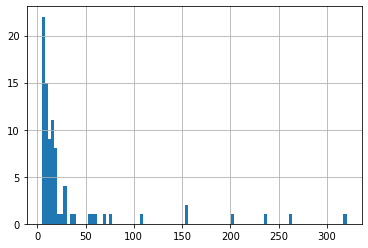

In [388]:
# Plot the alphas
alphas_spread = split_people.alpha
alphas_spread.hist(bins=100)

In [389]:
alphas_spread.describe()

count     85.000000
mean      32.027629
std       57.478695
min        5.066667
25%        8.111111
50%       13.613636
75%       20.544118
max      320.400000
Name: alpha, dtype: float64

In [ ]:
# Plot on histogram of the years

In [464]:
dude = split_people.loc[split_people.old_spid=='M_0000195']

In [465]:
dude

,new_spid,old_spid,new_names,old_official_name,sids,new_years,alpha,old_years,len
0,T_0000195,M_0000195,"{'權㮐', '權䭲', '權㻩'}",權䌖,"['kka_13607029_004', 'kka_13401003_004', 'kua_...","[1541, 1539, 1745, 1534, 1544, 1544, 1525, 175...",151.0,"[1731, 1737, 1737, 1736, 1735, 1908]",10


In [466]:
dude.old_spid

0    M_0000195
Name: old_spid, dtype: object

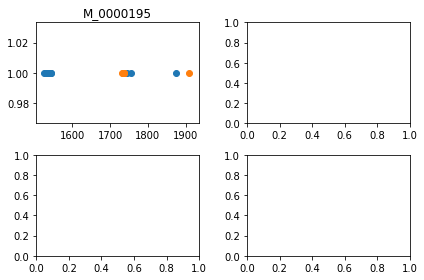

In [467]:
new_years = dude.new_years.tolist()[0]
old_years = dude.old_years.tolist()[0]


fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.scatter(new_years, len(new_years) * [1])#dude.old_years.tolist())
ax0.scatter(old_years, len(old_years) * [1])
ax0.set_title(dude.old_spid.values[0])

fig.tight_layout()
plt.show()

In [458]:
# From here: 
# https://matplotlib.org/3.2.0/gallery/lines_bars_and_markers/markevery_demo.html#sphx-glr-gallery-lines-bars-and-markers-markevery-demo-py

def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

In [444]:
for i, ax in enumerate(axes.flat):
    print(ax)

AxesSubplot(0.0927083,0.556944;0.376418x0.35)
AxesSubplot(0.580208,0.556944;0.376418x0.35)
AxesSubplot(0.0927083,0.0965278;0.376418x0.35)
AxesSubplot(0.580208,0.0965278;0.376418x0.35)


In [461]:
split_people[:10]

,new_spid,old_spid,new_names,old_official_name,sids,new_years,alpha,old_years,len
0,T_0000195,M_0000195,"{'權㮐', '權䭲', '權㻩'}",權䌖,"['kka_13607029_004', 'kka_13401003_004', 'kua_...","[1541, 1539, 1745, 1534, 1544, 1544, 1525, 175...",151.000000,"[1731, 1737, 1737, 1736, 1735, 1908]",10
1,T_0000233,M_0000233,{'金啓㾾'},金啓,['kwa_10302007_001'],[1803],262.200000,"[1558, 1450, 1569, 1558, 1567, 1558, 1441, 157...",1
2,T_0001690,M_0001690,{'金淑儉'},金叔儉,['kda_10706023_006'],[1425],9.000000,"[1434, 1455, 1417, 1432, 1432]",1
3,T_0011858,M_0011858,{'金思䄷'},金思,"['kva_11404007_002', 'kva_12003016_001', 'kva_...","[1790, 1796, 1798, 1801, 1787]",320.400000,[1474],5
4,T_0026296,M_0026296,{'趙德永'},鄭錫朝,['kxa_10302008_003'],[1837],15.666667,"[1856, 1849, 1855, 1854, 1849, 1853]",1
5,T_0010807,M_0010807,{'崔顥元'},崔灝元,['kga_11303014_001'],[1467],14.657143,"[1495, 1489, 1485, 1483, 1473, 1485, 1488, 148...",1
6,T_0004032,M_0004032,{'李敬仁'},李景仁,['kpa_11504012_001'],[1637],6.200000,"[1632, 1632, 1631, 1632, 1632, 1631, 1631, 163...",1
7,T_0055920,M_0055920,{'姜天霔'},趙愼言,['kba_10208001_004'],[1400],13.666667,"[1404, 1431, 1406]",1
8,T_0009957,M_0009957,{'李元成'},李元孫,['kna_12606009_012'],[1593],154.000000,"[1440, 1438, 1439]",1
9,T_0035014,M_0035014,{'金瑨'},金搢,['kpa_10809027_002'],[1630],7.571429,"[1627, 1627, 1613, 1624, 1612, 1627, 1627]",1


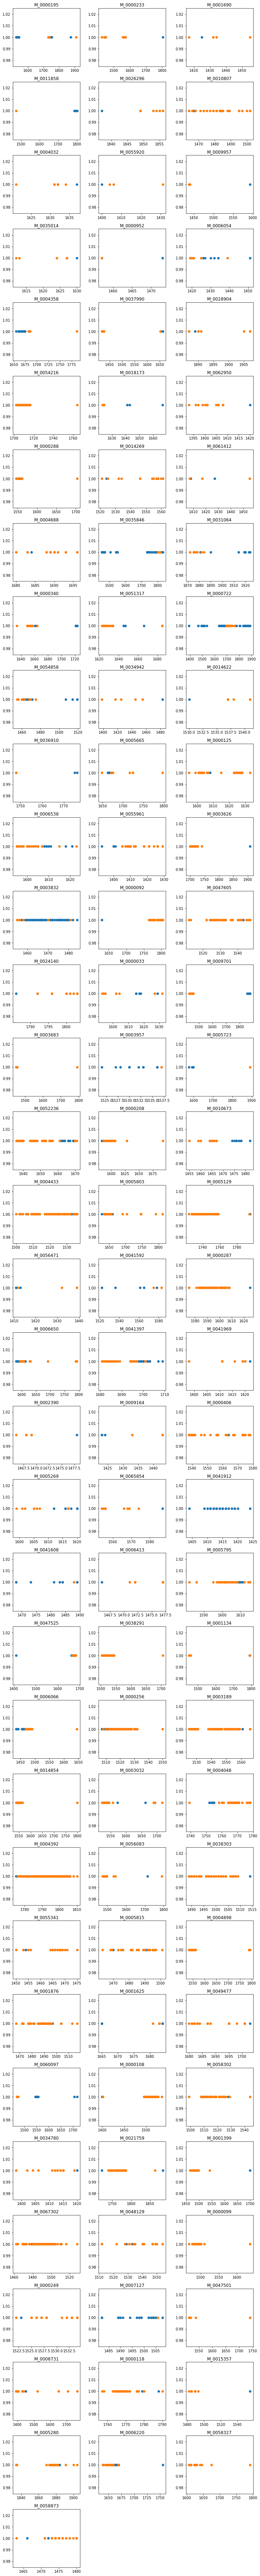

In [480]:
cases = len(split_people)

# define the figure size and grid layout properties
figsize = (10, 100)
cols = 3
rows = cases // cols + 1

fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, cases)
for ax, case in zip(axs, range(cases)):
    dude = split_people.loc[case]
    new_years = dude.new_years
    old_years = dude.old_years
    ax.set_title(dude.old_spid)
    ax.scatter(new_years, len(new_years) * [1])#dude.old_years.tolist())
    ax.scatter(old_years, len(old_years) * [1])


# for index,dude in split_people[:cases].iterrows():
#     new_years = dude.new_years
#     old_years = dude.old_years


# fig, axes = plt.subplots(nrows=2, ncols=2)
# ax0, ax1, ax2, ax3 = axes.flatten()

# ax0.scatter(new_years, len(new_years) * [1])#dude.old_years.tolist())
# ax0.scatter(old_years, len(old_years) * [1])
# ax0.set_title(dude.old_spid.values[0])

# fig.tight_layout()
# plt.show()